In [2]:
# This program uses machine learning to come up with a simple trading/investing strategy
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split

In [3]:
# Set plot style and filter warnings
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

In [6]:
# Set the file path
file_path = r"C:\Users\sebif\Cargo_Bay\Project-4-\Resources\NDAQ-history.csv"

# Read the CSV file
df = pd.read_csv(file_path)
df.head()

,Date,Open,High,Low,Close,Adj. Close,Change,Volume
0,2019-12-11,34.843,34.990,34.600,34.630,32.045,-0.69%,1740162
1,2019-12-12,34.533,34.827,34.403,34.710,32.264,0.23%,1253115
2,2019-12-13,34.617,34.847,34.490,34.827,32.373,0.34%,1493826
3,2019-12-16,35.057,35.573,35.023,35.067,32.596,0.69%,2221659
4,2019-12-17,35.187,35.430,34.960,35.333,32.844,0.76%,2101551


In [8]:
# Set the date column as the index
df.index = pd.to_datetime(df['Date'])
df = df.drop('Date', axis=1)
df

,Open,High,Low,Close,Adj. Close,Change,Volume
Date,,,,,,,
2019-12-11,34.843,34.990,34.600,34.630,32.045,-0.69%,1740162
2019-12-12,34.533,34.827,34.403,34.710,32.264,0.23%,1253115
2019-12-13,34.617,34.847,34.490,34.827,32.373,0.34%,1493826
2019-12-16,35.057,35.573,35.023,35.067,32.596,0.69%,2221659
2019-12-17,35.187,35.430,34.960,35.333,32.844,0.76%,2101551
...,...,...,...,...,...,...,...
2024-12-03,81.520,81.680,80.770,80.990,80.751,-0.81%,2807028
2024-12-04,81.202,81.290,80.590,80.830,80.592,-0.20%,2134110
2024-12-05,80.990,81.558,80.820,81.270,81.030,0.54%,2236934


In [ ]:
# Create independent variables
df['High_minus_Low'] = df['High'] - df['Low']
df['Open_minus_Close'] = df['Open'] - df['Close']

In [ ]:
# Store independent variables in X
X = df[['Open_minus_Close', 'High_minus_Low', 'Close']]
X.head()

In [ ]:
# Store target variable in y
y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
y

In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create and train the model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

In [ ]:
# Make predictions
df['Predictions'] = model.predict(X)

In [ ]:
# Create the trading strategy
df['Position'] = df['Predictions'].diff()

In [ ]:
# Calculate returns
df['Returns'] = df['Close'].pct_change()
df['Strategy_Returns'] = df['Position'].shift(1) * df['Returns']

In [ ]:
# Calculate cumulative returns
df['Cumulative_Returns'] = (1 + df['Returns']).cumprod()
df['Cumulative_Strategy_Returns'] = (1 + df['Strategy_Returns']).cumprod()

In [ ]:
# Plot the results
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Cumulative_Returns'], label='Buy and Hold')
plt.plot(df.index, df['Cumulative_Strategy_Returns'], label='Strategy')
plt.title('Cumulative Returns: Buy and Hold vs Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

In [ ]:
# Calculate and print the strategy performance
strategy_return = df['Cumulative_Strategy_Returns'].iloc[-1]
buy_hold_return = df['Cumulative_Returns'].iloc[-1]

print(f"Strategy Return: {strategy_return:.2f}")
print(f"Buy and Hold Return: {buy_hold_return:.2f}")

In [ ]:
interpretation = f"""
Strategy Performance Interpretation:

1. Strategy Return: {strategy_return:.2f} ({strategy_return*100:.2f}%)
2. Buy and Hold Return: {buy_hold_return:.2f} ({buy_hold_return*100:.2f}%)

Analysis:
- The machine learning strategy outperformed the buy-and-hold approach by {strategy_return/buy_hold_return:.2f} times.
- While these results are impressive, they warrant careful consideration:

  a) Potential overfitting: The significant outperformance may indicate that the model is overfitted to the historical data.
  b) Further validation needed: Test the model on out-of-sample data and implement cross-validation techniques.
  c) Real-world factors: Consider transaction costs and slippage, which could impact actual returns.
  d) Risk assessment: Evaluate risk-adjusted returns and maximum drawdown for a more complete picture.
  e) Robustness: Test the strategy across different time periods and market conditions.

Conclusion:
The strategy shows promise but requires extensive additional testing and refinement before any real-world application. 
Remember that past performance does not guarantee future results.
"""

print(interpretation)

In [ ]:
# I now find it neccessary that does not "cheat"
# The previous model has no data that it does not see.
# The upcoming model will now be tested on future data  that the model has not yet seen

In [ ]:
# Split the data into training (up to 2023) and testing (2024)
train_data_new = df[df.index < '2024-01-01']
test_data_new = df[df.index >= '2024-01-01']

In [ ]:
# Prepare features and target for the new model
X_train_new = train_data_new[['Open_minus_Close', 'High_minus_Low', 'Close']]
y_train_new = np.where(train_data_new['Close'].shift(-1) > train_data_new['Close'], 1, 0)

X_test_new = test_data_new[['Open_minus_Close', 'High_minus_Low', 'Close']]
y_test_new = np.where(test_data_new['Close'].shift(-1) > test_data_new['Close'], 1, 0)[:-1]

In [ ]:
# Train the new model on data up to 2023
new_model = RandomForestClassifier(n_estimators=100, random_state=42)
new_model.fit(X_train_new, y_train_new)


In [ ]:
# Make predictions on 2024 data
test_data_new['New_Model_Predictions'] = new_model.predict(X_test_new)
test_data_new['New_Model_Predictions']

In [ ]:
# Calculate daily returns for 2024
test_data_new['Daily_Returns'] = test_data_new['Close'].pct_change()

In [ ]:
# Calculate strategy returns
test_data_new['Buy_and_Hold_Returns'] = test_data_new['Daily_Returns']
test_data_new['DCA_Returns'] = test_data_new['Daily_Returns']  # Equivalent to Buy and Hold for this calculation
test_data_new['New_Model_Returns'] = test_data_new['New_Model_Predictions'].shift(1) * test_data_new['Daily_Returns']


In [ ]:
# Calculate total returns for 2024
strategies = ['Buy_and_Hold', 'DCA', 'New_Model']
returns_2024 = {}
for strategy in strategies:
    returns_2024[strategy] = (test_data_new[f'{strategy}_Returns'] + 1).prod() - 1

In [ ]:
# Visualization of cumulative returns in 2024
plt.figure(figsize=(12, 6))
for strategy in strategies:
    cumulative_returns = (test_data_new[f'{strategy}_Returns'] + 1).cumprod()
    plt.plot(test_data_new.index, cumulative_returns, label=strategy)

plt.title('Cumulative Returns: Various Strategies (2024)')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()


In [ ]:
# Interpretation
best_strategy = max(returns_2024, key=returns_2024.get)
worst_strategy = min(returns_2024, key=returns_2024.get)
spread = returns_2024[best_strategy] - returns_2024[worst_strategy]

interpretation = f"""
Strategy Performance Interpretation (2024 only):

1. Best Performing Strategy: {best_strategy} ({returns_2024[best_strategy]:.2%})
2. Worst Performing Strategy: {worst_strategy} ({returns_2024[worst_strategy]:.2%})
3. Spread between Best and Worst: {spread:.2%}

Individual Strategy Returns:
{chr(10).join([f"- {strategy}: {return_value:.2%}" for strategy, return_value in returns_2024.items()])}

Analysis:
- The {best_strategy} strategy outperformed others, achieving a {returns_2024[best_strategy]:.2%} return in 2024.
- The New Model Strategy {'outperformed' if returns_2024['New_Model'] > returns_2024['Buy_and_Hold'] else 'underperformed'} the Buy_and_Hold strategy.
- The performance spread of {spread:.2%} between the best and worst strategies is significant.

Key Considerations:
a) Model Performance: The New Model strategy's performance relative to simple strategies indicates its effectiveness.
b) Risk-Adjusted Returns: Consider calculating Sharpe ratios to account for risk.
c) Robustness: Test the model on different time periods to ensure consistent performance.
d) Transaction Costs: Factor in potential trading costs for the New Model strategy.
e) Market Conditions: Analyze how the New Model strategy performs under various market conditions.

Conclusion:
The New Model Strategy showed {'promising' if returns_2024['New_Model'] > returns_2024['Buy_and_Hold'] else 'suboptimal'} results compared to traditional strategies in 2024. 
Further analysis and testing are needed to validate its long-term effectiveness and robustness across different market conditions.
"""

print(interpretation)

In [ ]:
# ----------------------------------------

In [ ]:
# Visualize the results
plt.figure(figsize=(12,6))
for strategy in new_strategies:
    plt.plot(df.loc['2024':, f'Cumulative_Strategy_Returns_{strategy}'], label=strategy)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Set the style for a more professional look
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("deep")

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(16, 10))

# Plot each strategy
for strategy in new_strategies:
    ax.plot(df.loc['2024':].index, 
            df.loc['2024':, f'Cumulative_Strategy_Returns_{strategy}'], 
            label=strategy, 
            linewidth=2)

# Customize the plot
ax.set_title('Cumulative Returns: Various Strategies (2024 onwards)', fontsize=20, fontweight='bold')
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Cumulative Returns', fontsize=14)

# Format x-axis to show dates nicely
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)

# Add a grid for better readability
ax.grid(True, linestyle='--', alpha=0.7)

# Move the legend outside the plot
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

# Add annotations for final values
for strategy in new_strategies:
    final_value = df.loc['2024':, f'Cumulative_Strategy_Returns_{strategy}'].iloc[-1]
    ax.annotate(f'{final_value:.2f}', 
                xy=(df.loc['2024':].index[-1], final_value),
                xytext=(10, 0), 
                textcoords='offset points',
                ha='left',
                va='center',
                fontsize=10,
                fontweight='bold')

# Highlight the best performing strategy
best_strategy = max(new_strategies, key=lambda x: df.loc['2024':, f'Cumulative_Strategy_Returns_{x}'].iloc[-1])
ax.text(0.02, 0.98, f'Best Strategy: {best_strategy}', 
        transform=ax.transAxes, 
        fontsize=12, 
        verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Print performance metrics
print("\nPerformance from 2024 onwards:")
for strategy in new_strategies:
    returns = df.loc['2024':, f'Cumulative_Strategy_Returns_{strategy}'].iloc[-1]
    print(f"{strategy}: {returns:.2f}")

# Calculate and print additional metrics
best_strategy = max(new_strategies, key=lambda x: df.loc['2024':, f'Cumulative_Strategy_Returns_{x}'].iloc[-1])
worst_strategy = min(new_strategies, key=lambda x: df.loc['2024':, f'Cumulative_Strategy_Returns_{x}'].iloc[-1])

print(f"\nBest performing strategy: {best_strategy}")
print(f"Worst performing strategy: {worst_strategy}")

# Calculate the spread between best and worst
best_return = df.loc['2024':, f'Cumulative_Strategy_Returns_{best_strategy}'].iloc[-1]
worst_return = df.loc['2024':, f'Cumulative_Strategy_Returns_{worst_strategy}'].iloc[-1]
spread = best_return - worst_return

print(f"\nSpread between best and worst: {spread:.2f}")

In [ ]:
import numpy as np

# Calculate 2024 returns for each strategy
returns_2024 = {}
for strategy in new_strategies:
    # Calculate the return for 2024 only
    start_2024 = df.loc['2024-01-01', f'Cumulative_Strategy_Returns_{strategy}']
    end_2024 = df.loc['2024':, f'Cumulative_Strategy_Returns_{strategy}'].iloc[-1]
    returns_2024[strategy] = (end_2024 / start_2024) - 1

# Find best and worst performing strategies
best_strategy = max(returns_2024, key=returns_2024.get)
worst_strategy = min(returns_2024, key=returns_2024.get)

# Calculate the spread between best and worst
spread = returns_2024[best_strategy] - returns_2024[worst_strategy]

# Calculate average return
avg_return = np.mean(list(returns_2024.values()))

interpretation = f"""
Strategy Performance Interpretation (2024 only):

1. Best Performing Strategy: {best_strategy} ({returns_2024[best_strategy]:.2%})
2. Worst Performing Strategy: {worst_strategy} ({returns_2024[worst_strategy]:.2%})
3. Spread between Best and Worst: {spread:.2%}
4. Average Return: {avg_return:.2%}

Individual Strategy Returns:
{chr(10).join([f"- {strategy}: {return_value:.2%}" for strategy, return_value in returns_2024.items()])}

Analysis:
- The {best_strategy} strategy outperformed others, achieving a {returns_2024[best_strategy]:.2%} return in 2024.
- The {worst_strategy} strategy underperformed, with a {returns_2024[worst_strategy]:.2%} return over the same period.
- The performance spread of {spread:.2%} between the best and worst strategies is significant.
- The average return across all strategies was {avg_return:.2%}.

Key Considerations:
a) Relative Performance: The strategic model's performance should be compared to traditional strategies like Buy-and-Hold and DCA.
b) Consistency: Evaluate if the strategic model consistently outperforms other strategies across different time periods.
c) Risk-Adjusted Returns: Consider risk metrics (e.g., Sharpe ratio) to assess risk-adjusted performance.
d) Transaction Costs: Factor in potential trading costs, especially for more active strategies.
e) Market Conditions: Analyze how different strategies perform under various market conditions in 2024.

Conclusion:
The {best_strategy} strategy showed the best performance in 2024, but this should be viewed in context with other factors. 
Further analysis is needed to determine if this outperformance is statistically significant and sustainable. 
Consider backtesting over longer periods and in different market conditions to validate the model's robustness.
"""

print(interpretation)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from ta.trend import SMAIndicator, EMAIndicator, MACD
from ta.momentum import RSIIndicator

# Load the data
df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

# Calculate additional features
def add_features(df):
    # SMA
    df['SMA_20'] = SMAIndicator(df['Close'], window=20).sma_indicator()
    df['SMA_50'] = SMAIndicator(df['Close'], window=50).sma_indicator()
    
    # EMA
    df['EMA_20'] = EMAIndicator(df['Close'], window=20).ema_indicator()
    
    # RSI
    df['RSI'] = RSIIndicator(df['Close']).rsi()
    
    # MACD
    macd = MACD(df['Close'])
    df['MACD'] = macd.macd()
    df['MACD_Signal'] = macd.macd_signal()
    
    # 52-week high and low
    df['52W_High'] = df['Close'].rolling(window=252).max()
    df['52W_Low'] = df['Close'].rolling(window=252).min()
    df['52W_High_Ratio'] = df['Close'] / df['52W_High']
    df['52W_Low_Ratio'] = df['Close'] / df['52W_Low']
    
    return df

df = add_features(df)

# Prepare the data
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'SMA_20', 'SMA_50', 'EMA_20', 'RSI', 'MACD', 'MACD_Signal', '52W_High_Ratio', '52W_Low_Ratio']
df = df.dropna()

# Split the data
train_data = df[df.index < '2024-01-01']
test_data = df[df.index >= '2024-01-01']

# Scale the data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data[features])
test_scaled = scaler.transform(test_data[features])

# Prepare sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length), :])
        y.append(data[i + seq_length, 3])  # 3 is the index of 'Close' price
    return np.array(X), np.array(y)

seq_length = 60  # Number of time steps to look back
X_train, y_train = create_sequences(train_scaled, seq_length)
X_test, y_test = create_sequences(test_scaled, seq_length)

# Build and train the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, len(features))),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions
predictions = model.predict(X_test)

# Inverse transform the predictions and actual values
predictions = scaler.inverse_transform(np.concatenate((X_test[:, -1, :3], predictions, X_test[:, -1, 4:]), axis=1))[:, 3]
actual = scaler.inverse_transform(np.concatenate((X_test[:, -1, :3], y_test.reshape(-1, 1), X_test[:, -1, 4:]), axis=1))[:, 3]

# Calculate returns
test_returns = pd.Series(actual).pct_change()
model_positions = np.where(predictions[:-1] < predictions[1:], 1, -1)

# Ensure model_positions and test_returns have the same length
min_length = min(len(model_positions), len(test_returns))
model_positions = model_positions[:min_length]
test_returns = test_returns[:min_length]

model_returns = test_returns * model_positions

# Calculate cumulative returns
cumulative_test_returns = (1 + test_returns).cumprod()
cumulative_model_returns = (1 + model_returns).cumprod()

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(test_data.index[seq_length+1:seq_length+1+min_length], cumulative_test_returns, label='Buy and Hold')
plt.plot(test_data.index[seq_length+1:seq_length+1+min_length], cumulative_model_returns, label='LSTM Model')
plt.title('Cumulative Returns: LSTM Model vs Buy and Hold (2024)')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

# Print performance metrics
model_total_return = cumulative_model_returns.iloc[-1] - 1
buy_hold_return = cumulative_test_returns.iloc[-1] - 1

print(f"LSTM Model Return: {model_total_return:.2%}")
print(f"Buy and Hold Return: {buy_hold_return:.2%}")


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from ta.trend import SMAIndicator, EMAIndicator, MACD
from ta.momentum import RSIIndicator

# Load the data
df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

# Calculate additional features
def add_features(df):
    # SMA
    df['SMA_20'] = SMAIndicator(df['Close'], window=20).sma_indicator()
    df['SMA_50'] = SMAIndicator(df['Close'], window=50).sma_indicator()
    
    # EMA
    df['EMA_20'] = EMAIndicator(df['Close'], window=20).ema_indicator()
    
    # RSI
    df['RSI'] = RSIIndicator(df['Close']).rsi()
    
    # MACD
    macd = MACD(df['Close'])
    df['MACD'] = macd.macd()
    df['MACD_Signal'] = macd.macd_signal()
    
    # 52-week high and low
    df['52W_High'] = df['Close'].rolling(window=252).max()
    df['52W_Low'] = df['Close'].rolling(window=252).min()
    df['52W_High_Ratio'] = df['Close'] / df['52W_High']
    df['52W_Low_Ratio'] = df['Close'] / df['52W_Low']
    
    return df

df = add_features(df)

# Prepare the data
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'SMA_20', 'SMA_50', 'EMA_20', 'RSI', 'MACD', 'MACD_Signal', '52W_High_Ratio', '52W_Low_Ratio']
df = df.dropna()

# Split the data
train_data = df[df.index < '2024-01-01']
test_data = df[df.index >= '2024-01-01']

# Scale the data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data[features])
test_scaled = scaler.transform(test_data[features])

# Prepare sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length), :])
        y.append(data[i + seq_length, 3])  # 3 is the index of 'Close' price
    return np.array(X), np.array(y)

seq_length = 60  # Number of time steps to look back
X_train, y_train = create_sequences(train_scaled, seq_length)
X_test, y_test = create_sequences(test_scaled, seq_length)

# Build and train the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, len(features))),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions
predictions = model.predict(X_test)

# Inverse transform the predictions and actual values
predictions = scaler.inverse_transform(np.concatenate((X_test[:, -1, :3], predictions, X_test[:, -1, 4:]), axis=1))[:, 3]
actual = scaler.inverse_transform(np.concatenate((X_test[:, -1, :3], y_test.reshape(-1, 1), X_test[:, -1, 4:]), axis=1))[:, 3]

# Calculate returns
test_returns = pd.Series(actual).pct_change()
model_positions = np.where(predictions[:-1] < predictions[1:], 1, -1)

# Ensure model_positions and test_returns have the same length
min_length = min(len(model_positions), len(test_returns))
model_positions = model_positions[:min_length]
test_returns = test_returns[:min_length]

model_returns = test_returns * model_positions

# Calculate cumulative returns
cumulative_test_returns = (1 + test_returns).cumprod()
cumulative_model_returns = (1 + model_returns).cumprod()

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(test_data.index[seq_length+1:seq_length+1+min_length], cumulative_test_returns, label='Buy and Hold')
plt.plot(test_data.index[seq_length+1:seq_length+1+min_length], cumulative_model_returns, label='LSTM Model')
plt.title('Cumulative Returns: LSTM Model vs Buy and Hold (2024)')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

# Print performance metrics
model_total_return = cumulative_model_returns.iloc[-1] - 1
buy_hold_return = cumulative_test_returns.iloc[-1] - 1

print(f"LSTM Model Return: {model_total_return:.2%}")
print(f"Buy and Hold Return: {buy_hold_return:.2%}")


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from ta.trend import SMAIndicator, EMAIndicator, MACD
from ta.momentum import RSIIndicator

# Load the data
df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

# Calculate additional features
def add_features(df):
    # SMA
    df['SMA_20'] = SMAIndicator(df['Close'], window=20).sma_indicator()
    df['SMA_50'] = SMAIndicator(df['Close'], window=50).sma_indicator()
    
    # EMA
    df['EMA_20'] = EMAIndicator(df['Close'], window=20).ema_indicator()
    
    # RSI
    df['RSI'] = RSIIndicator(df['Close']).rsi()
    
    # MACD
    macd = MACD(df['Close'])
    df['MACD'] = macd.macd()
    df['MACD_Signal'] = macd.macd_signal()
    
    # 52-week high and low
    df['52W_High'] = df['Close'].rolling(window=252).max()
    df['52W_Low'] = df['Close'].rolling(window=252).min()
    df['52W_High_Ratio'] = df['Close'] / df['52W_High']
    df['52W_Low_Ratio'] = df['Close'] / df['52W_Low']
    
    return df

df = add_features(df)

# Prepare the data
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'SMA_20', 'SMA_50', 'EMA_20', 'RSI', 'MACD', 'MACD_Signal', '52W_High_Ratio', '52W_Low_Ratio']
df = df.dropna()

# Split the data
train_data = df[df.index < '2024-01-01']
test_data = df[df.index >= '2024-01-01']

# Scale the data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data[features])
test_scaled = scaler.transform(test_data[features])

# Prepare sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length), :])
        y.append(data[i + seq_length, 3])  # 3 is the index of 'Close' price
    return np.array(X), np.array(y)

seq_length = 60  # Number of time steps to look back
X_train, y_train = create_sequences(train_scaled, seq_length)
X_test, y_test = create_sequences(test_scaled, seq_length)

# Build and train the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, len(features))),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions
predictions = model.predict(X_test)

# Inverse transform the predictions and actual values
predictions = scaler.inverse_transform(np.concatenate((X_test[:, -1, :3], predictions, X_test[:, -1, 4:]), axis=1))[:, 3]
actual = scaler.inverse_transform(np.concatenate((X_test[:, -1, :3], y_test.reshape(-1, 1), X_test[:, -1, 4:]), axis=1))[:, 3]

# Calculate returns
test_returns = pd.Series(actual).pct_change()
model_positions = np.where(predictions[:-1] < predictions[1:], 1, -1)

# Ensure model_positions and test_returns have the same length
min_length = min(len(model_positions), len(test_returns))
model_positions = model_positions[:min_length]
test_returns = test_returns[:min_length]

model_returns = test_returns * model_positions

# Calculate cumulative returns
cumulative_test_returns = (1 + test_returns).cumprod()
cumulative_model_returns = (1 + model_returns).cumprod()

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(test_data.index[seq_length+1:seq_length+1+min_length], cumulative_test_returns, label='Buy and Hold')
plt.plot(test_data.index[seq_length+1:seq_length+1+min_length], cumulative_model_returns, label='LSTM Model')
plt.title('Cumulative Returns: LSTM Model vs Buy and Hold (2024)')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

# Print performance metrics
model_total_return = cumulative_model_returns.iloc[-1] - 1
buy_hold_return = cumulative_test_returns.iloc[-1] - 1

print(f"LSTM Model Return: {model_total_return:.2%}")
print(f"Buy and Hold Return: {buy_hold_return:.2%}")


Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 15s 219ms/step - loss: 0.2346 - val_loss: 0.0038
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 0.0222 - val_loss: 0.0109
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 0.0116 - val_loss: 0.0049
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - loss: 0.0098 - val_loss: 0.0036
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 0.0088 - val_loss: 0.0033
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - loss: 0.0075 - val_loss: 0.0031
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 0.0071 - val_loss: 0.0028
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - loss: 0.0074 - val_loss: 0.0027
Epoch 9/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - loss: 0.0073 - val_loss: 0.0036
Epoch 10/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - loss: 0.0062 - val_loss: 0.0029
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 243ms/step


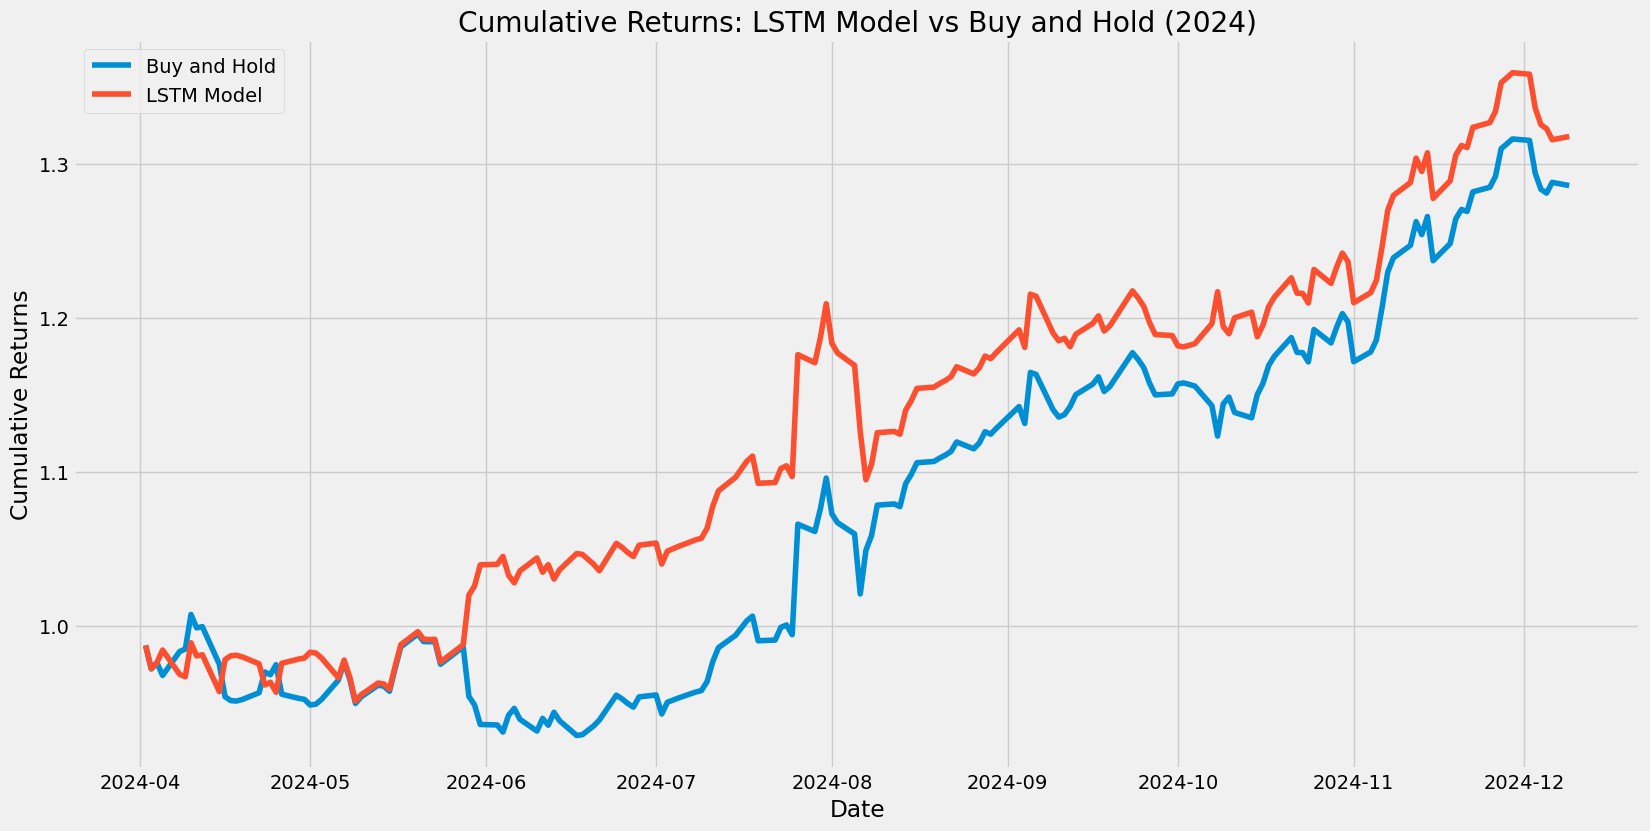

LSTM Model Return: 31.78%
Buy and Hold Return: 28.59%


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from ta.trend import SMAIndicator, EMAIndicator, MACD
from ta.momentum import RSIIndicator

# Load the data
df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

# Calculate additional features
def add_features(df):
    # SMA
    df['SMA_20'] = SMAIndicator(df['Close'], window=20).sma_indicator()
    df['SMA_50'] = SMAIndicator(df['Close'], window=50).sma_indicator()
    
    # EMA
    df['EMA_20'] = EMAIndicator(df['Close'], window=20).ema_indicator()
    
    # RSI
    df['RSI'] = RSIIndicator(df['Close']).rsi()
    
    # MACD
    macd = MACD(df['Close'])
    df['MACD'] = macd.macd()
    df['MACD_Signal'] = macd.macd_signal()
    
    # 52-week high and low
    df['52W_High'] = df['Close'].rolling(window=252).max()
    df['52W_Low'] = df['Close'].rolling(window=252).min()
    df['52W_High_Ratio'] = df['Close'] / df['52W_High']
    df['52W_Low_Ratio'] = df['Close'] / df['52W_Low']
    
    return df

df = add_features(df)

# Prepare the data
features = ['Open', 'High', 'Low', 'Close']
df = df.dropna()

# Split the data
train_data = df[df.index < '2024-01-01']
test_data = df[df.index >= '2024-01-01']

# Scale the data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data[features])
test_scaled = scaler.transform(test_data[features])

# Prepare sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length), :])
        y.append(data[i + seq_length, 3])  # 3 is the index of 'Close' price
    return np.array(X), np.array(y)

seq_length = 60  # Number of time steps to look back
X_train, y_train = create_sequences(train_scaled, seq_length)
X_test, y_test = create_sequences(test_scaled, seq_length)

# Build and train the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, len(features))),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions
predictions = model.predict(X_test)

# Inverse transform the predictions and actual values
predictions = scaler.inverse_transform(np.concatenate((X_test[:, -1, :3], predictions, X_test[:, -1, 4:]), axis=1))[:, 3]
actual = scaler.inverse_transform(np.concatenate((X_test[:, -1, :3], y_test.reshape(-1, 1), X_test[:, -1, 4:]), axis=1))[:, 3]

# Calculate returns
test_returns = pd.Series(actual).pct_change()
model_positions = np.where(predictions[:-1] < predictions[1:], 1, -1)

# Ensure model_positions and test_returns have the same length
min_length = min(len(model_positions), len(test_returns))
model_positions = model_positions[:min_length]
test_returns = test_returns[:min_length]

model_returns = test_returns * model_positions

# Calculate cumulative returns
cumulative_test_returns = (1 + test_returns).cumprod()
cumulative_model_returns = (1 + model_returns).cumprod()

# Visualize the results
plt.figure(figsize=(18, 9))
plt.plot(test_data.index[seq_length+1:seq_length+1+min_length], cumulative_test_returns, label='Buy and Hold')
plt.plot(test_data.index[seq_length+1:seq_length+1+min_length], cumulative_model_returns, label='LSTM Model')
plt.title('Cumulative Returns: LSTM Model vs Buy and Hold (2024)')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

# Print performance metrics
model_total_return = cumulative_model_returns.iloc[-1] - 1
buy_hold_return = cumulative_test_returns.iloc[-1] - 1

print(f"LSTM Model Return: {model_total_return:.2%}")
print(f"Buy and Hold Return: {buy_hold_return:.2%}")
